In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

np.random.seed(0)

In [4]:
# read in data
earthquakes = pd.read_csv('C:/Users/Victiny/Python_Project/Data_Cleaning/data_example/earthquakes.csv')
earthquakes.head()

,Unnamed: 0,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [6]:
# column 'Date' has type Object
earthquakes['Date'].dtype

dtype('O')

In [10]:
"""Multiple format"""
# check format of Date
date_lengths = earthquakes['Date'].str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [20]:
# find the indices corresponding to the rows with a differeent format
idx = np.where(date_lengths==24)
# or: idx = np.where([date_lengths==24])[1]
earthquakes.loc[idx]

,Unnamed: 0,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [60]:
# split date and time in the 3 rows
idx_format2 = []
for id in idx[0][:]:
    earthquakes.loc[id, 'Date'] = earthquakes.loc[id, 'Date'][:10]
    earthquakes.loc[id, 'Time'] = earthquakes.loc[id, 'Time'][11:19]
    idx_format2.append(id)
print(earthquakes.loc[idx, 'Date'])
print(earthquakes.loc[idx, 'Time'])
idx_format2

3378     1975-02-23
7512     1985-04-28
20650    2011-03-13
Name: Date, dtype: object
3378     
7512     
20650    
Name: Time, dtype: object


[3378, 7512, 20650]

In [68]:
# convert 'Date' to datetime
earthquakes.loc[~earthquakes.index.isin(idx_format2), 'date_parsed'] = pd.to_datetime(earthquakes.loc[~earthquakes.index.isin(idx_format2), 'Date'], format='%m/%d/%Y')
earthquakes.loc[earthquakes.index.isin(idx_format2), 'date_parsed'] = pd.to_datetime(earthquakes.loc[earthquakes.index.isin(idx_format2), 'Date'], format='%Y-%m-%d')
print(earthquakes.loc[idx, 'date_parsed'])
print(earthquakes.loc[:3, 'date_parsed'])

3378    1975-02-23
7512    1985-04-28
20650   2011-03-13
Name: date_parsed, dtype: datetime64[ns]
0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
Name: date_parsed, dtype: datetime64[ns]


In [71]:
"""have pandas try to infer what the right date format should be"""
# not always able to infer
# slow
earthquakes['date_parsed2'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)
earthquakes.loc[idx, 'date_parsed2']

3378    1975-02-23
7512    1985-04-28
20650   2011-03-13
Name: date_parsed2, dtype: datetime64[ns]

In [73]:
"""Select the day of the month"""
dom = earthquakes['date_parsed'].dt.day
dom.head()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64

<AxesSubplot:xlabel='date_parsed'>

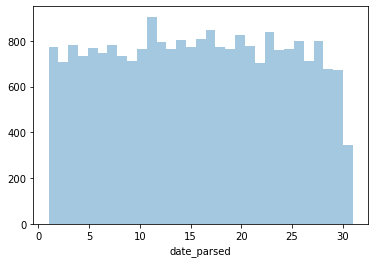

In [76]:
# plot the day of the month ro check the date parsing
dom = dom.dropna()
sns.distplot(dom, kde=False, bins=31)